In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

### Read data

In [2]:
data_1 = pd.read_csv("./dataset/WineReviews/winemag-data-130k-v2.csv", index_col=0)
data_2 = pd.read_csv("./dataset/WineReviews/winemag-data_first150k.csv", index_col=0)
data = pd.concat([data_1, data_2], axis=0)
data.shape

(280901, 13)

### Data review
- We can find that 'country','designation','province','region_1','region_2','taster_name','taster_twitter_handle','variety' and 'winery' are nominal attibutes. There are no sequence relation between attibutes.

- 'points' and 'price' belong to numeric attribute.

In [3]:
data.head(5)

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [4]:
data.describe()

,points,price
count,280901.000000,258210.000000
mean,88.146934,34.177162
std,3.151528,38.611708
min,80.000000,4.000000
25%,86.000000,16.000000
50%,88.000000,25.000000
75%,90.000000,40.000000
max,100.000000,3300.000000


#### First of all, I will present the frequency of each category in each nominal attribute.

In [5]:
Counter(data["country"])

Counter({'Italy': 43018,
         'Portugal': 11013,
         'US': 116901,
         'Spain': 14913,
         'France': 43191,
         'Germany': 4617,
         'Argentina': 9431,
         'Chile': 10288,
         'Australia': 7286,
         'Austria': 6402,
         'South Africa': 3659,
         'New Zealand': 4739,
         'Israel': 1135,
         'Hungary': 377,
         'Greece': 1350,
         'Romania': 259,
         'Mexico': 133,
         'Canada': 453,
         nan: 68,
         'Turkey': 142,
         'Czech Republic': 18,
         'Slovenia': 181,
         'Luxembourg': 15,
         'Croatia': 162,
         'Georgia': 129,
         'Uruguay': 201,
         'England': 83,
         'Lebanon': 72,
         'Serbia': 26,
         'Brazil': 77,
         'Moldova': 130,
         'Morocco': 40,
         'Peru': 16,
         'India': 17,
         'Bulgaria': 218,
         'Cyprus': 42,
         'Armenia': 2,
         'Switzerland': 11,
         'Bosnia and Herzegovina': 6,
      

### !!! In order to simplify the result, the following similar results are not implemented.

In [ ]:
Counter(data["designation"])

In [ ]:
Counter(data["province"])

In [ ]:
Counter(data["region_1"])

In [ ]:
Counter(data["region_2"])

In [ ]:
Counter(data["taster_name"])

In [ ]:
Counter(data["taster_twitter_handle"])

In [ ]:
Counter(data["variety"])

In [ ]:
Counter(data["winery"])

#### For numeric attributes, five-number summary and the count of null value will be presented.

> points:  Minimum:80   Q1:86   Median:88   Q3:90   Maximum:100

> price:  Minimum:4   Q1:16   Median:25   Q3:40   Maximum:3300

In [6]:
data.describe()

,points,price
count,280901.000000,258210.000000
mean,88.146934,34.177162
std,3.151528,38.611708
min,80.000000,4.000000
25%,86.000000,16.000000
50%,88.000000,25.000000
75%,90.000000,40.000000
max,100.000000,3300.000000


> The count of null value in attribute 'points' is 0.

> The count of null value in attribute 'price' is 22691.

In [7]:
data[["points", "price"]].isnull().sum()

points        0
price     22691
dtype: int64

#### The data distribution of attribute 'points' basically conforms to the normal distribution.

Text(0, 0.5, 'Frequency')

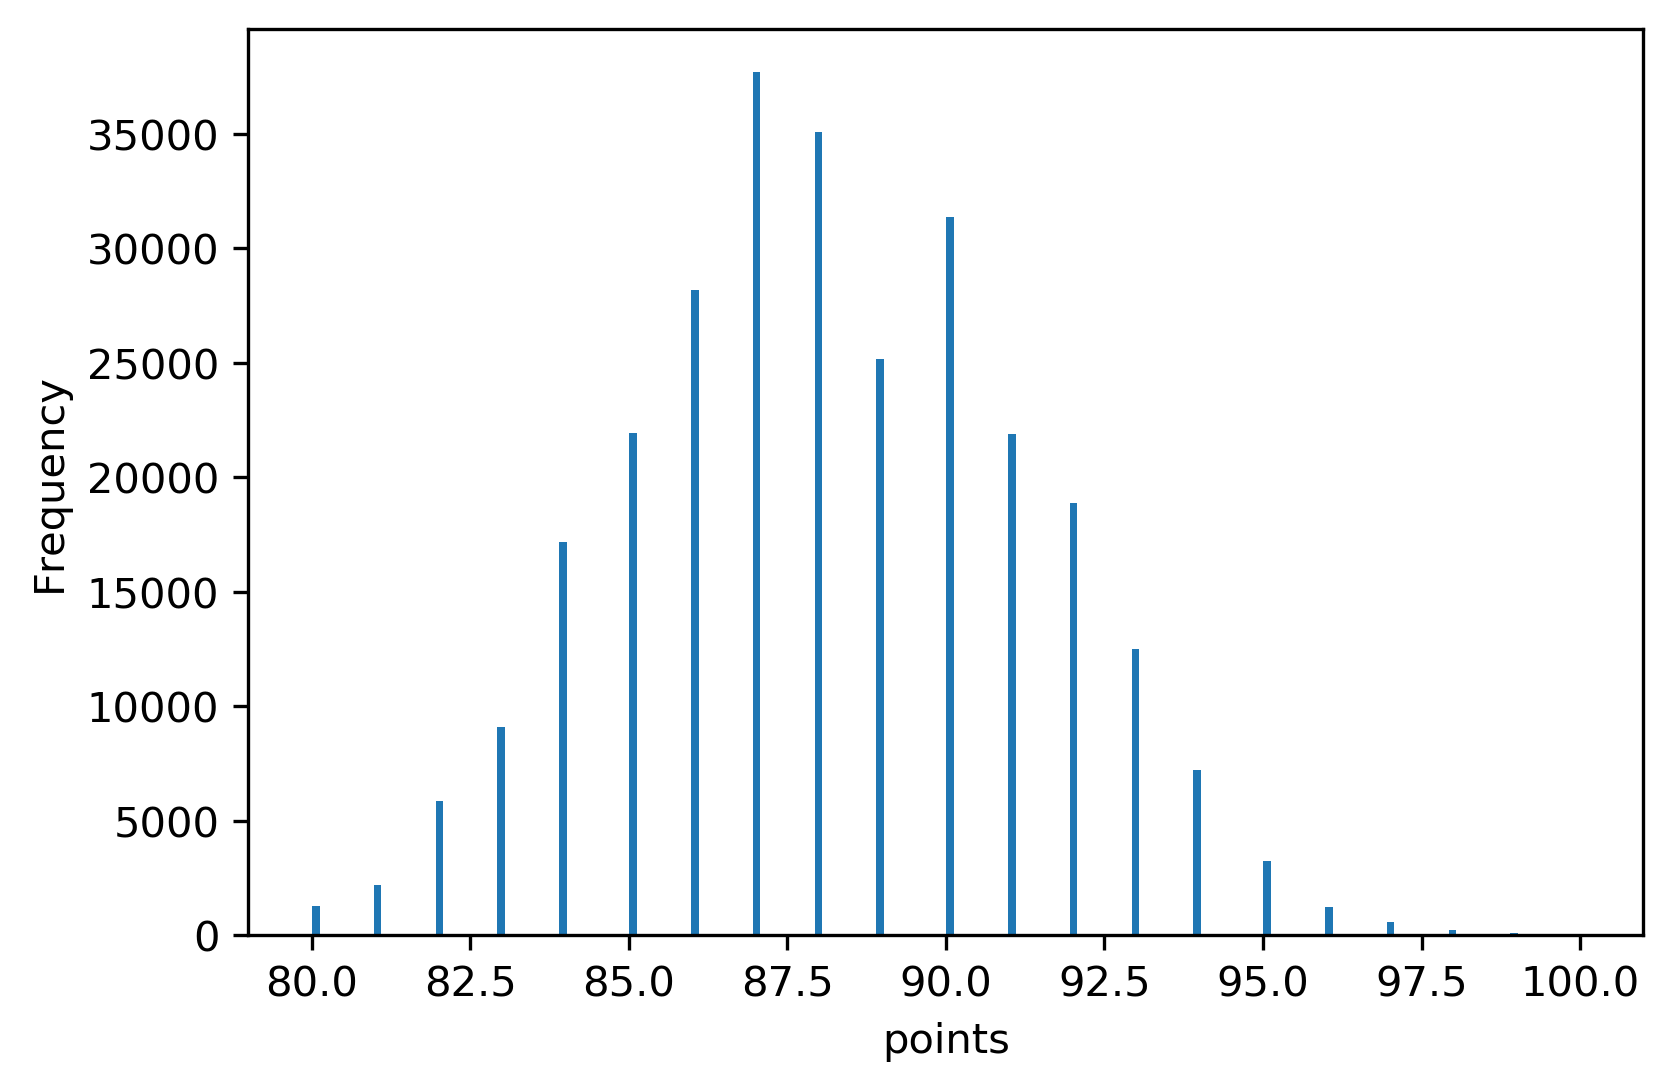

In [8]:
plt.figure(dpi=300)
plt.hist(x=data["points"], bins="auto")
plt.xlabel("points")
plt.ylabel("Frequency")

#### The data are mainly distributed between 0 and 135.

(0, 10000)

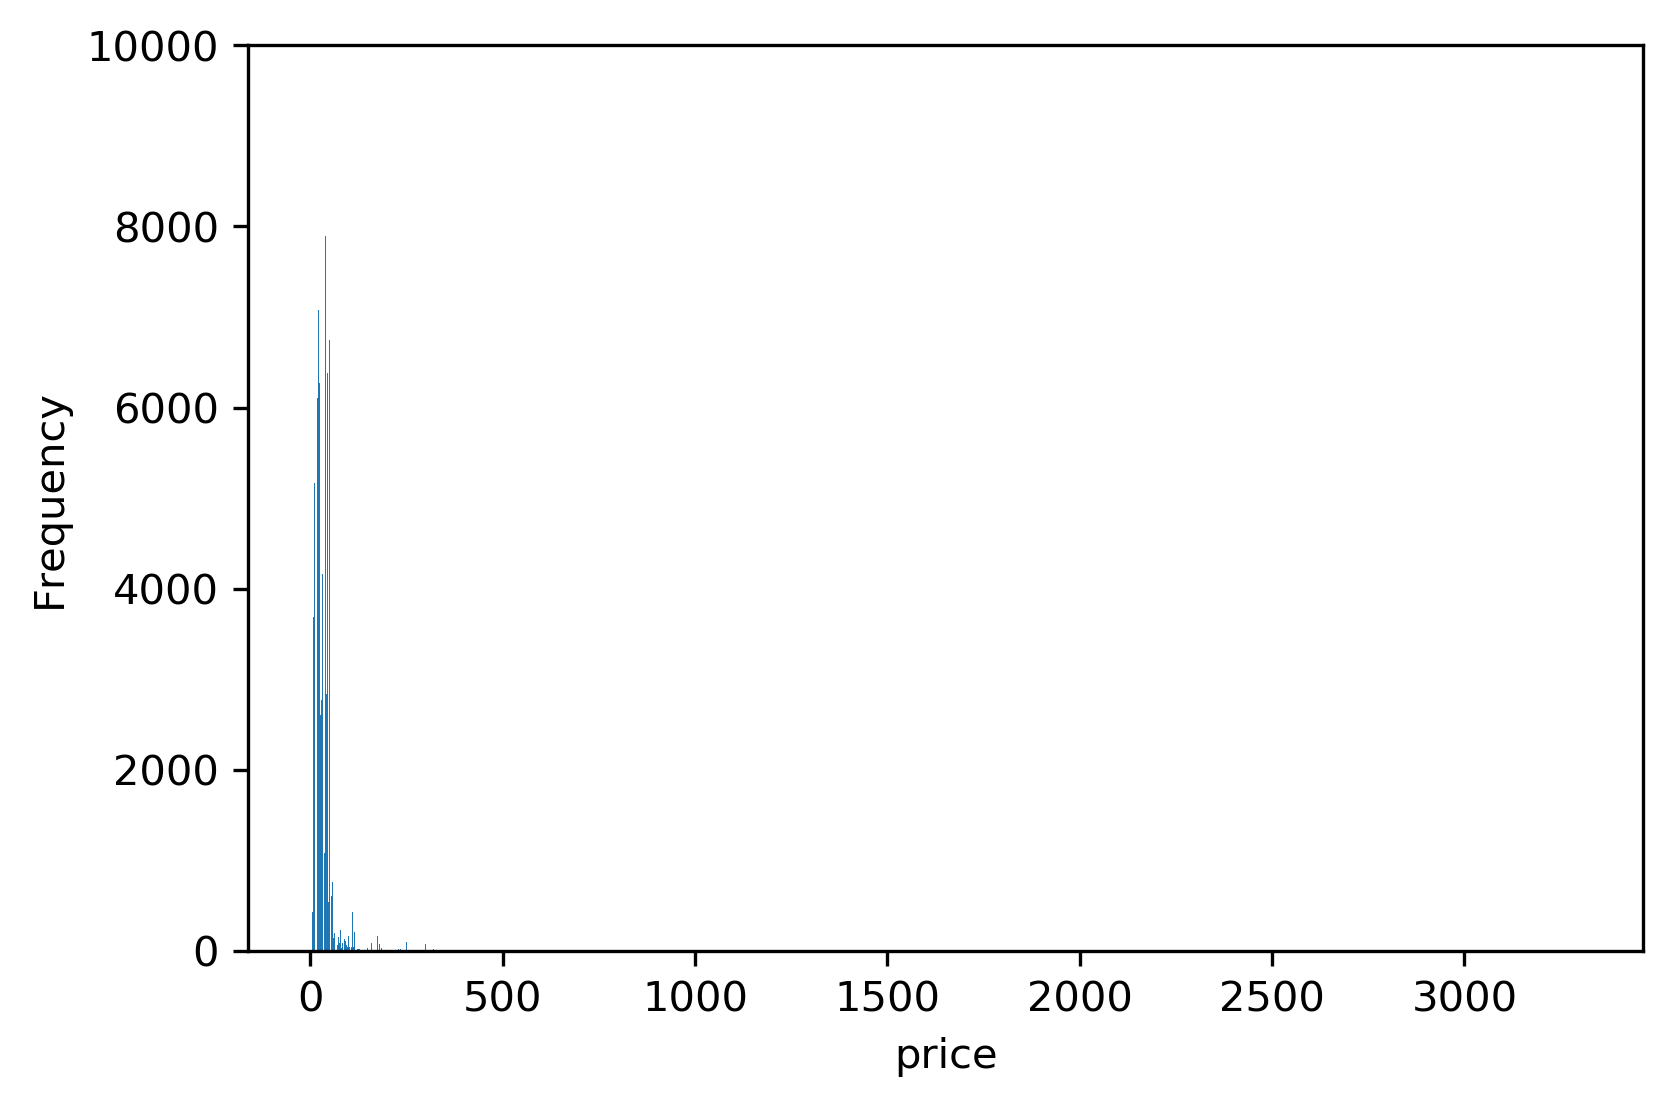

In [9]:
plt.figure(dpi=300)
plt.hist(x=data["price"], bins="auto")
plt.xlabel("price")
plt.ylabel("Frequency")
plt.ylim(0, 10000)

#### Boxplot for numeric attributes.

> For attribute 'points', IQR equals to 6. It's Q3 is 90, meaning that all the samples which points is higher than 96 will be regarded as outlier.

{'whiskers': [<matplotlib.lines.Line2D at 0x7fb8be07dd50>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb8be07d210>,
 'boxes': [<matplotlib.patches.PathPatch at 0x7fb8bdd82610>],
 'medians': [<matplotlib.lines.Line2D at 0x7fb8be0437d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fb8be043290>],
 'means': []}

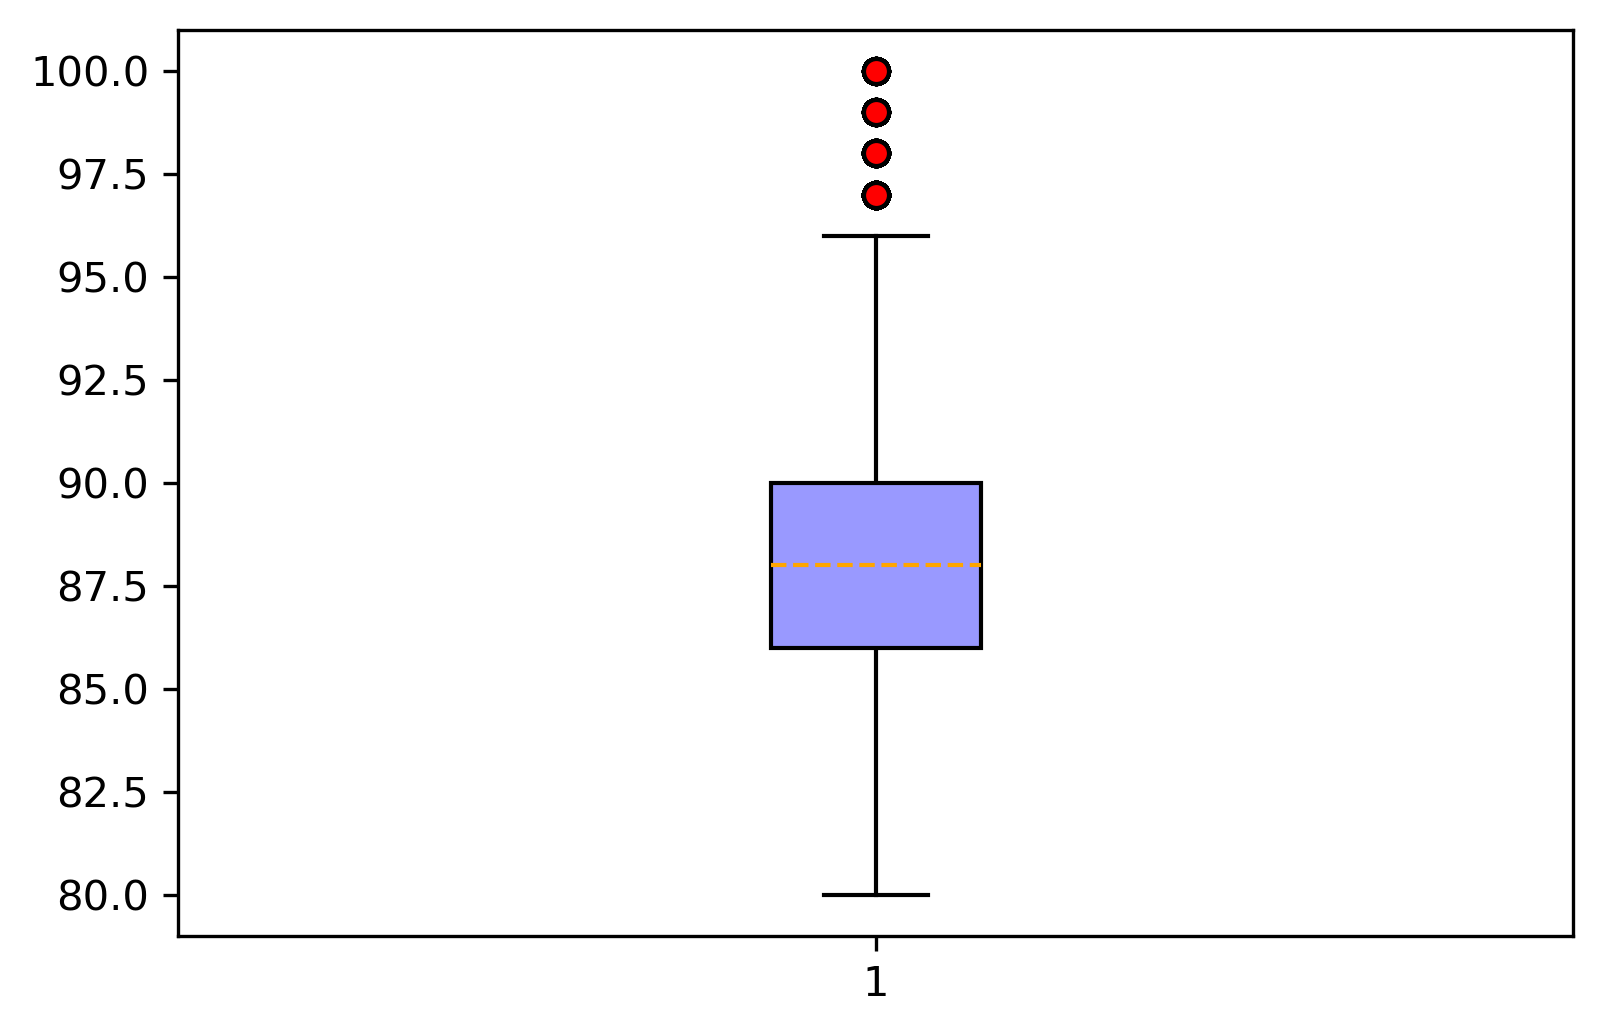

In [10]:
plt.figure(dpi=300)
plt.boxplot(data["points"],patch_artist=True,boxprops = {'color':'black','facecolor':'#9999ff'},
 
            flierprops = {'marker':'o','markerfacecolor':'red','color':'black'},
 
            meanprops = {'marker':'D','markerfacecolor':'indianred'},
            medianprops = {'linestyle':'--','color':'orange'})

#### Boxplot for attribute 'price'.

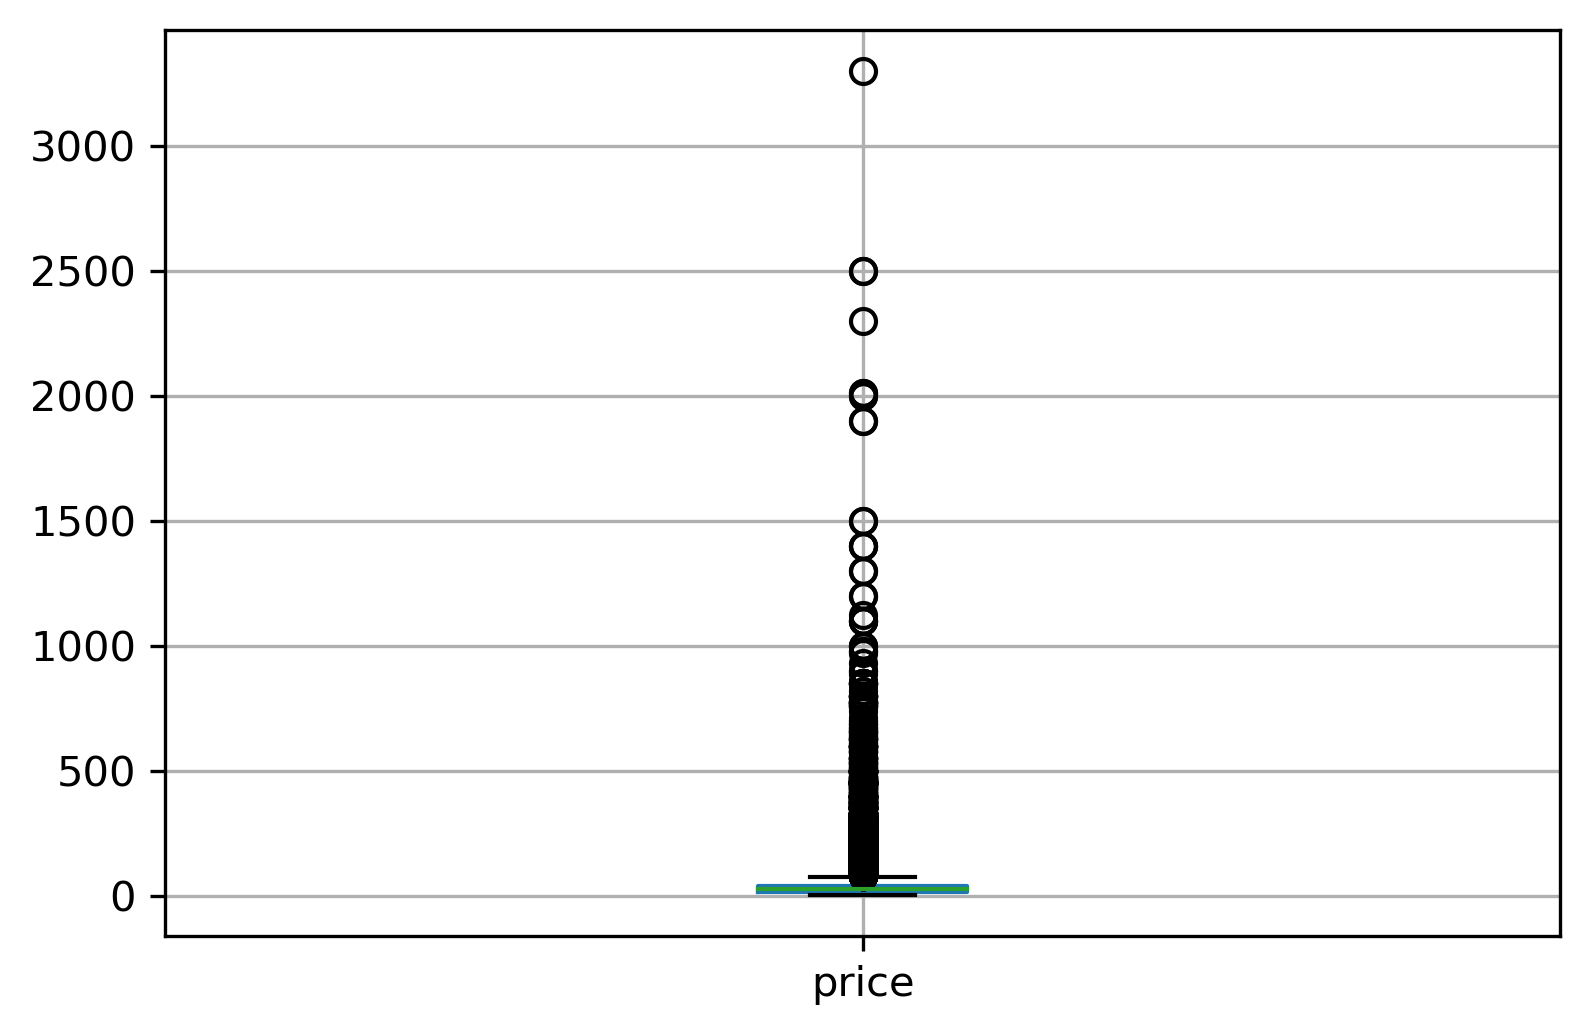

In [11]:
import seaborn as sns
plt.figure(dpi=300)
# sns.boxplot(data["price"])
data.boxplot(column="price")

In [12]:
data.isnull().sum()

country                      68
description                   0
designation               83200
points                        0
price                     22691
province                     68
region_1                  46307
region_2                 169437
taster_name              177174
taster_twitter_handle    182143
title                    150930
variety                       1
winery                        0
dtype: int64

#### At this part, I will use z-scores to detect extreme outliers which absolute value of z-scores are higher than 10.
> Notably, everyone knows that wines could be extremely expensive. As a result, we shouldn't treat these samples as measuring errors.

In [13]:
from scipy import stats
df_price = pd.DataFrame(data["price"])
price_zscore = df_price.apply(stats.zscore)
outlier_mask = ((price_zscore > 10).any(axis=1)).values + ((price_zscore < -10).any(axis=1)).values
df_price.loc[outlier_mask, :]

,price


### Handle null values

In [14]:
def nullplot(data):
    '''
    data: a dataframe on which we want to perform null plot
    '''
    df_null = data.isna()
    nulls_percent_per_col = df_null.sum(axis=0) / len(data)
    
    plt.figure(dpi=600)
    fig, (ax_1, ax_2) = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(8, 10))
    
    pla = matplotlib.cm.get_cmap("plasma")
    colormap = matplotlib.colors.ListedColormap([pla(0), 'gold'])
    sns.heatmap(data.isnull(), cmap=colormap, ax=ax_1, cbar=False, yticklabels=False)
    nulls_percent_per_col.plot(kind="bar", color="gold", x=nulls_percent_per_col, y=nulls_percent_per_col.index, 
                               ax=ax_2, label="Null value percent")
    ax_2.set_ylim((0,1))
    plt.show()

#### The drawing below presents the null value in each attribute.

<Figure size 3600x2400 with 0 Axes>

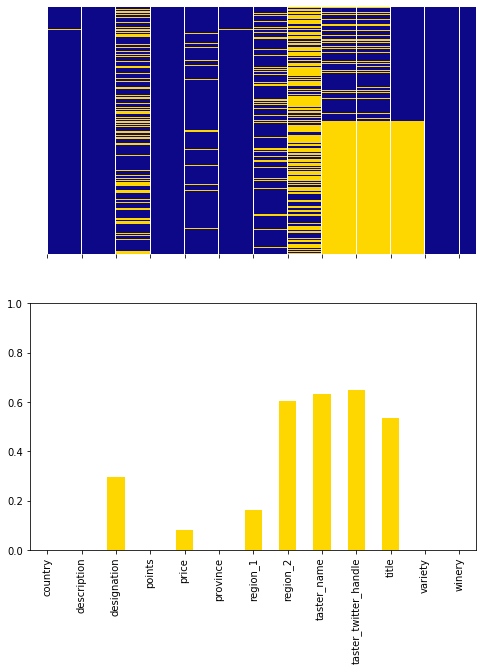

In [15]:
nullplot(data)

#### Eliminate null values --- drop rows

I will drop all rows containing "too much" null values.

<Figure size 3600x2400 with 0 Axes>

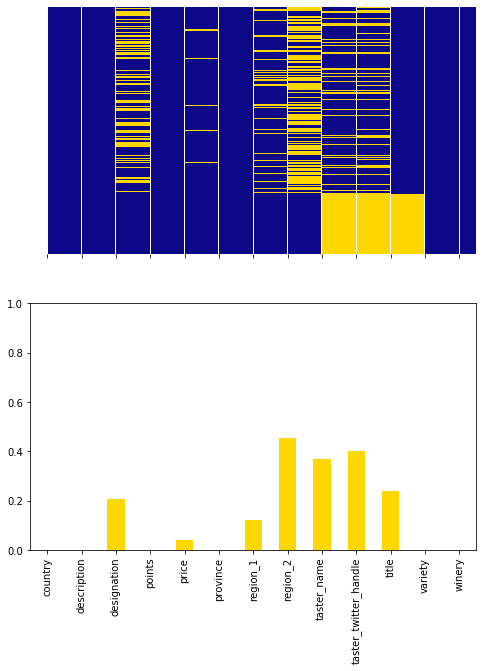

In [16]:
data_4 = data.copy()
data_4 = data_4.dropna(axis=0, thresh=10)
nullplot(data_4)

#### Replace null values with most common value of the column.

Most common value of each column:
 country                                                                 US
description              A little bit funky and unsettled when you pop ...
designation                                                        Reserve
points                                                                  87
price                                                                   20
province                                                        California
region_1                                                       Napa Valley
region_2                                                     Central Coast
taster_name                                                     Roger Voss
taster_twitter_handle                                           @vossroger
title                    Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma...
variety                                                         Pinot Noir
winery                                                     Willia

<Figure size 3600x2400 with 0 Axes>

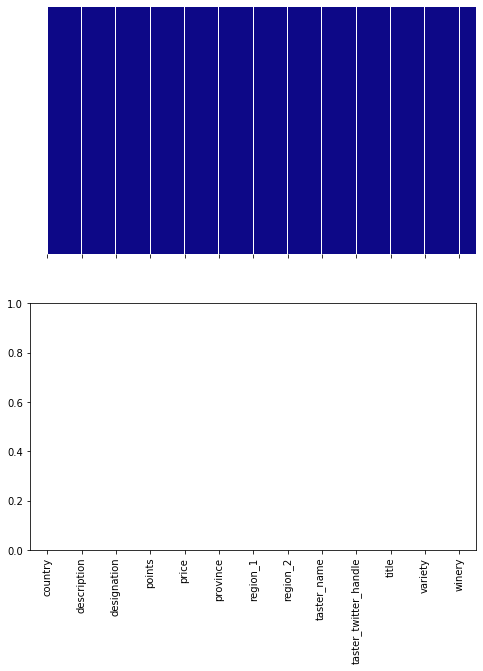

In [17]:
data_5 = data.copy()
def find_nost_common_value(series):
    '''
    To find the most common value of the column
    '''
    return series.value_counts().index[0]
most_common_value = data_5.apply(find_nost_common_value, axis=0)
print("Most common value of each column:\n", most_common_value)
data_5[data_5.columns.values] = data_5[data_5.columns.values].fillna(most_common_value)
nullplot(data_5)

#### The missing values are filled by the correlation of attributes.
Intuitively, 'taster_name' and 'taster-twitter-handle' have some implicit correlation. One taster may have several twitter IDs but these twitter IDs correspond to one single person. So it is significant to merge these two columns into one.

In [18]:
data_6 = data.copy()
only_name = data_6.loc[data_6['taster_twitter_handle'].isnull() & data_6['taster_name'].notna(), 
                   ['taster_name', 'taster_twitter_handle']]
num_only_name = len(only_name.index)

only_twitter = data_6.loc[data_6['taster_name'].isnull() & data_6['taster_twitter_handle'].notna(), 
                      ['taster_name', 'taster_twitter_handle']]
num_only_twitter = len(only_twitter.index)

print(f'rows containing a name but no twitter handle: {num_only_name}'
      + f'\nrows containing a twitter handle but no taster name: {num_only_twitter}')

rows containing a name but no twitter handle: 4969
rows containing a twitter handle but no taster name: 0


#### So, we can simply drop the column 'taster_twitter_handle' as it doesn't provide any further information.

<Figure size 3600x2400 with 0 Axes>

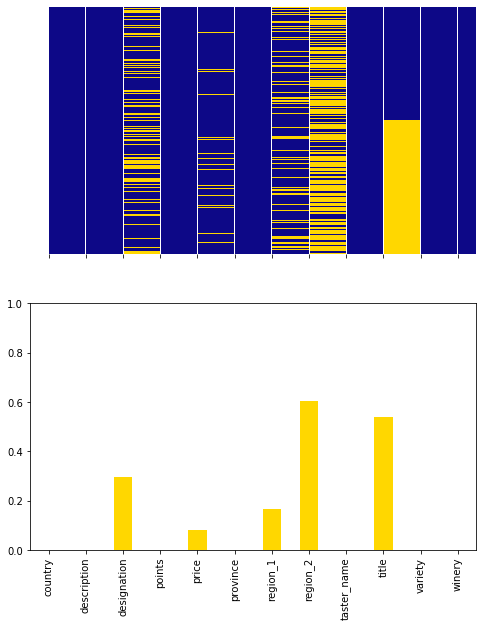

In [19]:
data_6 = data_6.drop("taster_twitter_handle", axis=1)
data_6['taster_name'] = data_6['taster_name'].fillna('Unknown')
nullplot(data_6)

#### The missing values are filled by the similarity between data objects.
I will use attributes 'country','points','province','winery' to predict price.

In [20]:
data_7 = data.copy()
data_feature = data_7[['country', 'points', 'province', 'winery', 'price']]
data_feature = data_feature.loc[data_feature['country'].notnull(), :]
data_feature = data_feature.loc[data_feature['province'].notnull(), :]
data_feature.head(5)

,country,points,province,winery,price
0,Italy,87,Sicily & Sardinia,Nicosia,NaN
1,Portugal,87,Douro,Quinta dos Avidagos,15.0
2,US,87,Oregon,Rainstorm,14.0
3,US,87,Michigan,St. Julian,13.0
4,US,87,Oregon,Sweet Cheeks,65.0


#### Encode nominal attributes and normalization

In [21]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data_feature['country'] = le.fit_transform(data_feature['country'])
data_feature['province'] = le.fit_transform(data_feature['province'])
data_feature['winery'] = le.fit_transform(data_feature['winery'])
print("After encode:\n", data_feature.head(5))

data_feature[['country', 'points', 'province', 'winery']] = data_feature[['country', 'points', 'province', 'winery']].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
print("After normalization:\n", data_feature.head(5))

After encode:
    country  points  province  winery  price
0       23      87       377   13219    NaN
1       35      87       116   14763   15.0
2       46      87       305   14836   14.0
3       46      87       245   16411   13.0
4       46      87       305   16669   65.0
After normalization:
     country  points  province    winery  price
0  0.469388    0.35  0.770961  0.689423    NaN
1  0.714286    0.35  0.237219  0.769949   15.0
2  0.938776    0.35  0.623722  0.773756   14.0
3  0.938776    0.35  0.501022  0.855899   13.0
4  0.938776    0.35  0.623722  0.869354   65.0


#### Split training set and prediction set

In [22]:
data_price_known = data_feature.loc[data_feature['price'].notnull(), :]
data_price_unknown = data_feature.loc[data_feature['price'].isnull(), :]

X_train = data_price_known.drop('price', axis=1)
y_train = data_price_known['price']

X_pred = data_price_unknown.drop('price', axis=1)


#### Train model and predict

In [23]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X=X_train, y=y_train)
X_pred['price'] = lr.predict(X_pred)
data_all = pd.concat([data_price_known,  X_pred], axis=0, ignore_index=True)

<Figure size 3600x2400 with 0 Axes>

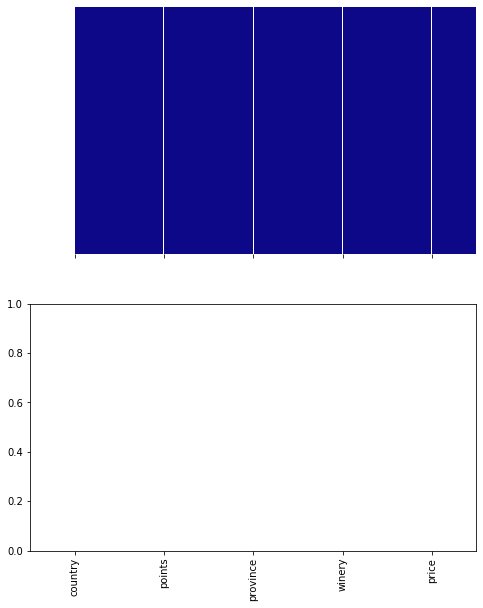

In [24]:
nullplot(data_all)

In [25]:
data_all.head(10)

,country,points,province,winery,price
0,0.714286,0.35,0.237219,0.769949,15.0
1,0.938776,0.35,0.623722,0.773756,14.0
2,0.938776,0.35,0.501022,0.855899,13.0
3,0.938776,0.35,0.623722,0.869354,65.0
4,0.857143,0.35,0.605317,0.874152,15.0
5,0.469388,0.35,0.770961,0.892563,16.0
6,0.326531,0.35,0.024540,0.916814,24.0
7,0.367347,0.35,0.717791,0.501200,12.0
8,0.326531,0.35,0.024540,0.535673,27.0
9,0.938776,0.35,0.108384,0.554605,19.0
